# This Worksheet will hopefully be a refernce for you to remeber how to use different aspects of gPhoton in the future, and if anyone wants to learn as well hopefully this will be able to help them do so 

In [2]:
# import gPhoton moduels by from gPhoton.module import module
from gPhoton.gFind import gFind
from gPhoton.gMap import gMap
from gPhoton.gAperture import gAperture
from gPhoton.gphoton_utils import read_lc
import gPhoton.gMap
import gPhoton.gAperture
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os
%matplotlib inline

/Users/tboudreaux/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# gMap - used to generate fits files for a particulat location in the sky | gMap output should be avloided for hard analysis and instead used for quick checks and visulizations, this is because gMap images are not intensity calibrated.

In [24]:
gMap(band='NUV', skypos=[0.095125,0.109931], skyrange=[0.05, 0.05], intfile='test3.fits', 
     overwrite=True)

In [65]:
gFind(band='NUV', skypos=[0.095125,0.109931], maxgap=100., minexp=100.)

NUV: 3711.0s (raw) in 5 exposures.
    [ 750688158.995, 750688272.995 ], 114.000 seconds
    [ 875248746.995, 875249191.995 ], 445.000 seconds
    [ 875349342.995, 875350679.995 ], 1337.000 seconds
    [ 875355260.995, 875356795.995 ], 1535.000 seconds
    [ 875397938.995, 875398218.995 ], 280.000 seconds


{'NUV': {'expt': 3711.0,
  't0': array([  7.50688159e+08,   8.75248747e+08,   8.75349343e+08,
           8.75355261e+08,   8.75397939e+08]),
  't1': array([  7.50688273e+08,   8.75249192e+08,   8.75350680e+08,
           8.75356796e+08,   8.75398219e+08])}}

# This is the general help form for gPhoton modules -> the actual things are methods inside modules inside the total gPhoton package

In [71]:
help(gPhoton.gAperture)
help(gPhoton.gMap)
help(gPhoton.gFind)

Help on module gPhoton.gAperture in gPhoton:

NAME
    gPhoton.gAperture - .. module:: gAperture

FILE
    /Users/tboudreaux/.local/lib/python2.7/site-packages/gPhoton-1.27.1-py2.7.egg/gPhoton/gAperture.py

DESCRIPTION
       :synopsis: Module for the creation of GALEX  light curves with user-defined
       time bins and photometric apertures.
    
    .. moduleauthor:: Chase Million <chase.million@gmail.com>

FUNCTIONS
    __main__()
        Called when gAperture is executed through the command line.
    
    check_annulus(args)
        Checks and formats the annulus values.
        
        :param args: The command-line arguments.
        
        :type args: argparse.ArgumentParser Namespace
        
        :returns: argparse.ArgumentParser Namespace -- The updated command-line
        arguments.
    
    check_args(args, iam='gaperture')
        Checks validity of command line arguments and, in some cases
        modifies them a little bit.
        
        :param args: The comman

# gAperture returns intensity calibrated data in a delimited format that can be plotted imedidiatly to a light curve
# It should also be noted here that all moduels that I've used so far can be stored as python dicts, so thats the object that these variables are getting assigned to

In [30]:
gaData = gAperture(band='NUV', skypos=[176.919525856024,0.255696872807351], radius=0.03)

AB Magnitudes:               
[ 15.79396479  15.80814471  15.81670107  13.05747382  15.7894637
  15.82261987]


In [34]:
print gaData.keys()

['flat_counts', 'mcat_bg', 'bg_counts', 'flux_bgsub_err', 'cps_mcatbgsub', 'counts', 'mag_mcatbgsub', 'cps_err', 'mag_bgsub', 'cps_bgsub', 'detys', 'flux_bgsub', 'flux_err', 'mag_err_1', 'params', 'cps_bgsub_err', 't1_data', 'bg', 'responses', 't_mean', 'cps_mcatbgsub_err', 'mag_bgsub_err_1', 'mag_err_2', 't0_data', 'racent', 'deccent', 'mag', 'exptime', 'bg_flat_counts', 'detxs', 't0', 't1', 'mag_mcatbgsub_err_2', 'flux', 'mag_mcatbgsub_err_1', 'flags', 'mag_bgsub_err_2', 'detrad', 'cps', 'flux_mcatbgsub_err', 'photons', 'flux_mcatbgsub']


In [36]:
gaData = gAperture(band='NUV', skypos=[176.919525856024,0.255696872807351]
                   , radius=0.03, annulus=[0.03, 0.04], trange=[766525332.995
                  ,766526576.995])

AB Magnitudes:               
[ 13.05747382]


# Here I generate a light curve using gAperature, stepsz parameter defines (in seconds) the integration size per bin obever the time range (trange) that I have defined (trange is defined in GALEX time), if no trange is defined then gAperature will use all avalible data for the given target

In [40]:
gaData = gAperture(band='NUV', skypos=[176.919525856024,0.255696872807351]
                   , radius=0.03, annulus=[0.03, 0.04], stepsz=100, csvfile='lctone.csv')

In [41]:
Mags = gaData['mag']

In [43]:
print len(Mags)

41


In [48]:
x = np.linspace(0,4100, 41)

In [49]:
print x

[    0.    102.5   205.    307.5   410.    512.5   615.    717.5   820.
   922.5  1025.   1127.5  1230.   1332.5  1435.   1537.5  1640.   1742.5
  1845.   1947.5  2050.   2152.5  2255.   2357.5  2460.   2562.5  2665.
  2767.5  2870.   2972.5  3075.   3177.5  3280.   3382.5  3485.   3587.5
  3690.   3792.5  3895.   3997.5  4100. ]


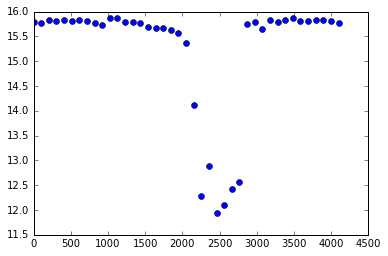

In [55]:
plt.plot(x, Mags, 'o')

# So to make a note of what I did above there, I used gAperature to extract infomration about a specific location in the sky, that returnes a large dictionary, full of information usefull when one needs to do more ricourous science for callibration checkiing and whatnot. There is an entery in the dictionaly - 'mag', I extracted the informatoin from that and dumped it into a list for ease of accese. The I generated a time array with the first element being 0s and the last one being 4100s and 41 points inbetween. I got 4100s because I set my integration time to be 100s and I checked and that returned 41 results, thus 4100s. Simplly plotting them in matplot lib shows the flare that is talked about on the github user manual. 

In [57]:
image_file = 'test3.fits'

In [58]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: test3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      19   (119, 120, 8)   float64   
1                BinTableHDU     14   8R x 3C      [E, E, E]   


In [59]:
image_data = hdu_list[0].data

In [60]:
hdu_list.close()

# Now I am going to try to produced count maps and light curves for a couple targets, I can't use MCAT to check FUV and NUV mags yet because the first pass read is still running. These will be picked manually from the list of targets produced by the manual read

Step One - grab ligh curve data

In [2]:
AptData = gAperture(band = 'NUV', skypos=[136.503583, 4.629194], radius = 0.03, annulus = [0.03, 0.04], stepsz=10)

AB Magnitudes:               
[ 15.09992072  15.14105483  15.12715254  15.01518347  15.07186494
  15.12114944  15.2437277   15.15918206  15.11342626  15.12224617
  15.22545893  15.16913346  15.24575886  15.20121393  15.15114908
  15.10917956  15.12483713  15.05019077  15.09669044  15.14636117
  15.10258504  15.13297587  15.08933925  15.12693202  15.15532866
  15.11473506  15.06748027  15.05456907  15.07860583  15.08395698
  15.07932786  15.1327506   15.13391354  15.17341807  15.13487818
  15.14382188  15.13061741  15.08971039  14.97058452  15.14997326
  15.1480025   15.13136191  15.09587585  15.18744939  15.11211532
  15.10747674  15.12415259  15.10167156  15.2030998   15.20547441
  15.11162576  15.07252052  15.0330081   15.0750583   15.12688987
  15.13688316  15.06018352  15.15894755  15.14839292  15.13884487
  15.18594126  15.17638777  15.13940563  15.0344691   14.92117316
  15.07263972  15.25736508  15.15948196  15.17274493  15.18770046
  15.064277    15.11803114  15.19495836  15.19

In [3]:
Mags = AptData['mag']

In [4]:
len(Mags)

182

In [5]:
x = np.linspace(0, 1820, 182)

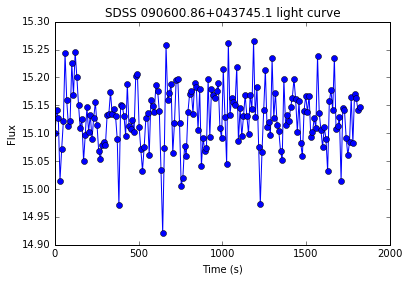

In [7]:
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.title('SDSS 090600.86+043745.1 light curve')
plt.plot(x, Mags, 'o-')

Step two - Grab count map data

In [73]:
CntData = gMap(band = 'NUV', skypos=[136.503583, 4.629194], coadd = True, 
               intfile='SDSS090600.86+043745.1Intensity.fits', cntfile='SDSS090600.86+043745.1Count.fits',
              skyrange=[0.2, 0.2])

That was a sucsess, both the images appere to be okay, now we will do the same thing for a couple more stars, but I will write a function to automate it a bit more first

In [14]:
def GenLC(RA, Dec, b = 'NUV', incriment = 10):
    gData = gAperture(band = b, skypos = [RA, Dec], radius = 0.03, annulus = [0.03, 0.04], stepsz = incriment,
                     csvfile = 'GENLC' + str(RA) + str(Dec) + '.csv')
    readlc = read_lc('GENLC' + str(RA) + str(Dec) + '.csv')
    plt.plot(readlc['t_mean'], readlc['flux_bgsub'], 'ko')

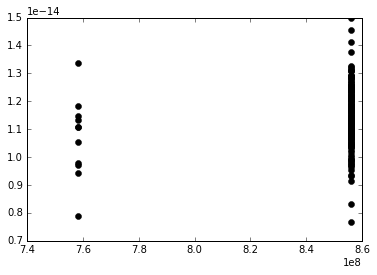

In [15]:
GenLC(136.503583, 4.629194)

In [19]:
def GenIMG(RA, Dec, Name='Star', b = 'NUV'):
    gMap(band=b, skypos = [RA, Dec], skyrange = [0.1, 0.1], intfile=Name+'intensity.fits',
        cntfile = Name+'Count.fits', coadd = True, overwrite = True)

# Here I am using my GenIMG funcition to quickly generate some intensity and count maps for different targets, the function trades a bit of time saving for loosing some control, which for this porpus right now I am willing to do

In [8]:
GenIMG(136.503583, 4.629194)

In [20]:
GenIMG(12.731875, 43.561611, Name='FBS_0048+432A')

In [21]:
GenIMG(37.159375, 26.376750, Name='SDSSJ_022838.25+262236.3')

In [22]:
GenIMG(47.370167, -2.549931, Name='KUV_03070-0244')

# Next we will do the same thing to all these stars, exept we will generate movies instead, first to write a movie function

In [29]:
def GenMOV(RA, Dec, Name='Star', b = 'NUV'):
    gMap(band=b, skypos = [RA, Dec], skyrange = [0.1, 0.1], intfile=Name+'intensityMov.fits',
        cntfile = Name+'CountMov.fits', overwrite = True, stepsz=10)

In [26]:
GenMOV(12.731875, 43.561611, Name='FBS_0048+432A')

In [30]:
GenMOV(37.159375, 26.376750, Name='SDSSJ_022838.25+262236.3')

In [28]:
GenMOV(47.370167, -2.549931, Name='KUV_03070-0244')

# What did I learn from these last few commands? First of all FBS_0048+432A's movie actually came out quite well, it looks cool. You cant see the main stars in the other movies, this intially confused me because you can see them in the images I produced, however this makes sense, the movies have frames integrated over 10s exposures times, the images have a single frame integrated over all the avalible exposure time for these targets (all above 600s most above 1500s) thus they are far more visable.

In [31]:
def GenMOV2(RA, Dec, Name='Star', b = 'NUV'):
    gMap(band=b, skypos = [RA, Dec], skyrange = [0.1, 0.1], intfile=Name+'intensityMov.fits',
        cntfile = Name+'CountMov.fits', overwrite = True, stepsz=100)

# What I did above was to change the frame integration size, that made the star visible for the SDSS target, which more or less confirmed what I said before, that was the issue. Now I am going to work on getting the light curve thing to work, and maybe getting some automated lightcurve prodcution up and running.

In [11]:
targetlistname = 'sdBLCMakeTest.csv'
targetlist = open(targetlistname, 'rb')
targetlist = targetlist.readlines()
targetlist = [x.rsplit() for x in targetlist]

In [21]:
for i in range(5):
    gData = gAperture(band = 'NUV', skypos = [float(targetlist[i][1]), float(targetlist[i][2])], radius = 0.03, 
                      annulus = [0.03, 0.04], stepsz = 10, csvfile = 'GENLC_' + str(targetlist[i][0]) + '.csv')
    print i,'data query(s) done'
    readlc = read_lc('GENLC_' + str(targetlist[i][0]) + '.csv')
    plt.plot(readlc['t_mean'], readlc['flux_bgsub'], 'ko')
    plt.savefig('GENLC_' + str(targetlist[i][0]) + '.pdf')
    plt.close()

0 data query(s) done
1 data query(s) done
2 data query(s) done
3 data query(s) done
4 data query(s) done


# That generated 5 light curves sucssessfuly, however it was very slow, this is where the cluster might come in handy big time. Still have to talk to Dr. Fleming about the Light Curves, they look wonkey to me. Currently switching this into a script that can be run in a more automated fashion

In [81]:
# Prototype code for a script that will be part of pipeline
# Will only work in directory where the file is present, so this may not work if you load up the notebook again
#    and don't change its location, just so you know.
testfile = read_lc('GENLC_PB_5670.csv')
finalfile = []
fluxfile = []
fluxerr = []
flags = []
exptime = []
detRAD = []
gapnum = 0
prevloc = 0
greatestdiffernce = 0
for i in range(len(testfile['t_mean'])):
    if i+1 < len(testfile['t_mean']):
        if testfile['t_mean'][i+1] - testfile['t_mean'][i] > 1800:
            differnce = testfile['t_mean'][i+1] - testfile['t_mean'][i]
            if differnce > greatestdiffernce:
                greatestdiffernce = differnce
            else:
                pass
            finalfile.append(testfile['t_mean'][prevloc:i+1])
            fluxfile.append(testfile['flux_bgsub'][prevloc:i+1])
            fluxerr.append(testfile['flux_err'][prevloc:i+1])
            flags.append(testfile['flags'][prevloc:i+1])
            exptime.append(testfile['exptime'][prevloc:i+1])
            detRAD.append(testfile['detrad'][prevloc:i+1])
            prevloc = i+1
            gapnum += 1
        else:
            pass
    else:
        pass
finalfile = [x.tolist() for x in finalfile]
fluxfile = [x.tolist() for x in fluxfile]
fluxerr = [x.tolist() for x in fluxerr]
flags = [x.tolist() for x in flags]
exptime = [x.tolist() for x in exptime]
detRAD = [x.tolist() for x in detRAD]

for i in range(len(finalfile)):
    goodflux = []
    goodtime = []
    gooderr = []
    badflux = []
    badtime = []
    baderr = []
    for j in range(len(fluxerr[i])):
        if flags[i][j] is not 0:
            badflux.append(fluxfile[i][j])
            badtime.append(finalfile[i][j])
            baderr.append(fluxerr[i][j])
        else:
            goodflux.append(fluxfile[i][j])
            goodtime.append(finalfile[i][j])
            gooderr.append(fluxerr[i][j])
    plt.errorbar(goodtime, goodflux, yerr=gooderr, fmt='o')
    plt.errorbar(badtime, badflux, yerr=baderr, fmt='o') # Work on getting flags running, your close but not there
    plt.plot(goodtime, goodflux, 'ko-')
    plt.plot(badtime, badflux, 'ro-')
    plt.xlabel('Time(s)')
    plt.ylabel('Background subtracted Flux')
    plt.savefig('PB_5670_LC_ZONE' + str(i+1) + '.pdf')
    plt.close()
    plt.plot(finalfile[i], exptime[i], 'o-')
    plt.xlabel('Time(s)')
    plt.ylabel('Effective Exposure time (s)')
    plt.savefig('PB_5670_EXPvsTIME_ZONE' + str(i+1) + '.pdf')
    plt.close()
    plt.plot(finalfile[i], detRAD[i], 'o-')
    plt.xlabel('Time(s)')
    plt.ylabel('Effective Radius (units)')
    plt.savefig('PB_5670_RADvsTIME_ZONE' + str(i+1) + '.pdf')
    plt.close()
    
# gFind(band ='NUV', skypos = [0.095125, 0.109931], maxgap = 100., minexp=600.)

# More or less this works, it creates the plots and does a good job of finding the subsections that I am interested in, which is fun and all. Now I will write code to output HTML

In [21]:
def dirreturn():
    os.chdir('/Users/tboudreaux/Programming/SummerSTSCI')

In [41]:
# This cell is here to reset the working directory for you, run it and you will be retunred
dirreturn()

In [72]:
dirreturn()
start = os.path.abspath('.')
os.chdir('sdBs/TwentyRun')
dir = os.listdir('.')
numtarg = len(dir)
for i in range(numtarg):
    numzones = 0
    pathtox = []
    try:
        os.chdir(dir[i])
        checkzones = os.listdir('.')
        for x in checkzones:
            if '.png' in x:
                pathtox.append(os.path.abspath(x))
                zonefind = x.find('ZONE')
                if int(x[zonefind+5]) > int(numzones):
                    numzones = int(x[zonefind+5])
                else:
                    pass
        for j in range(numzones):
            htmlout = open(dir[i] + 'ZONE_' + str(j+1) + '.html', 'w')
            if j < numzones-1:
                nextlink = os.path.abspath('.') + '/' + dir[i] + 'ZONE_' + str(j+2) + '.html'
            else:
                precheckhtml = os.listdir(os.path.abspath('..') + '/' + dir[i+1])
                print precheckhtml
                htmlgo = False
                for x in precheckhtml:
                    if '.html' in x:
                        htmlgo = True
                    else:
                        pass
                nextlink = os.path.abspath('..') + '/' + dir[i+1] + '/' + dir[i+1] + 'ZONE_1.html'
            if htmlgo is True:
                htmlout.write('<!DOCTYPE html>\n'
                          '<html>\n'
                          '<head>\n'
                          '<title>Summer STScI gPhoton HTML pipleline</title>\n'
                          '</head>\n'
                          '<body>\n'
                          '<h1>STScI Summer internship pipeline</h1>\n'
                          '<table style = "width:100%">\n'
                          '\t<td><img src="' + pathtox[j] + '" alt="img", style="width:1400px;height:700px;"></td>\n'
                          '</table>\n'
                          '<form action="' + nextlink + '">\n'
                          '\t<input type="submit" value="Go To Google">\n'
                          '</form>'
                          '</body>\n'
                          '</html>')
            else:
                htmlout.write('<!DOCTYPE html>\n'
                          '<html>\n'
                          '<head>\n'
                          '<title>Summer STScI gPhoton HTML pipleline</title>\n'
                          '</head>\n'
                          '<body>\n'
                          '<h1>STScI Summer internship pipeline</h1>\n'
                          '<table style = "width:100%">\n'
                          '\t<td><img src="' + pathtox[j] + '" alt="img", style="width:1400px;height:700px;"></td>\n'
                          '</table>\n'
                          '</body>\n'
                          '</html>')
            htmlout.close()
        os.chdir('..')
    except OSError:
        pass
os.chdir(start)

IndentationError: expected an indented block (<ipython-input-72-26e2749a78d3>, line 51)